In [2]:
from google.colab import files

uploaded = files.upload()

Saving lady_mail.txt to lady_mail.txt


In [25]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm, trange
import nltk
import re
import string

In [4]:
data = pd.read_csv('lady_mail.txt')

In [5]:
data.head()

,text
0,Насыщенный интересный день. За любые дела вы ...
1,Будьте практичны. Этот день может положить на...
2,Благоприятный день. Если вы проявите инициати...
3,"Первая половина дня удачна. Вам часто везет, ..."
4,"Серьезных проблем этот день не приносит, но в..."


In [6]:
texts = data['text']

In [7]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

def token_and_stem(text):
  tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
  filtered_tokens = []
  for token in tokens:
    if re.search('[а-яА-Я]', token):
      filtered_tokens.append(token)
  stems = [stemmer.stem(t) for t in filtered_tokens]
  return stems

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stopwords = nltk.corpus.stopwords.words('russian')
stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на'])

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

n_featur = 200000
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                   min_df=0.01, stop_words=stopwords,
                                   use_idf=True, tokenizer=token_and_stem, ngram_range=(1,3))

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['бол', 'больш', 'будт', 'быт', 'вед', 'впроч', 'всег', 'всегд', 'даж', 'друг', 'е', 'ег', 'ем', 'есл', 'ест', 'ещ', 'зач', 'зде', 'ил', 'иногд', 'когд', 'конечн', 'куд', 'лучш', 'межд', 'мен', 'мног', 'мо', 'можн', 'нег', 'нельз', 'нибуд', 'никогд', 'нич', 'опя', 'посл', 'пот', 'почт', 'разв', 'сво', 'себ', 'совс', 'теб', 'тепер', 'тог', 'тогд', 'тож', 'тольк', 'хорош', 'хот', 'чег', 'чут', 'эт'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [14]:
num_clusters = 5

from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)

In [16]:
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [18]:
out = {'text': texts, 'cluster': clusters}
frame = pd.DataFrame(out, columns=['text', 'cluster'])

In [19]:
frame.head()

,text,cluster
0,Насыщенный интересный день. За любые дела вы ...,2
1,Будьте практичны. Этот день может положить на...,2
2,Благоприятный день. Если вы проявите инициати...,3
3,"Первая половина дня удачна. Вам часто везет, ...",1
4,"Серьезных проблем этот день не приносит, но в...",1


In [22]:
def stopwords_rus(text):
    text = regex.sub('', text)
    text = [token for token in text.split() if token not in stopwords]
    return ' '.join(text)

In [26]:
regex = re.compile('[%s]' % re.escape(string.punctuation))

In [28]:
x = token_and_stem(stopwords_rus(frame['text'][0]))
' '.join(x)

'насыщен интересн ден за люб дел берет неподдельн энтузиазм отчаст имен поэт добива успех ещ одн причин явля ваш способн лад людьм делегирова полномоч обраща действительн гот помоч вы отказыва поддержк нужн комут мног проника искрен симпат возможн знакомств котор положат нача дружеск романтическ отношен не исключ ктот влюб перв взгляд'

In [29]:
clusters_text = []
for i in range(num_clusters):
  s_i = ''
  for j in range(len(frame['text'])):
    if frame['cluster'].iloc[j] == i:
      x = token_and_stem(stopwords_rus(frame['text'].iloc[j]))
      s_i = s_i + ' '.join(x)
  clusters_text.append(s_i)

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

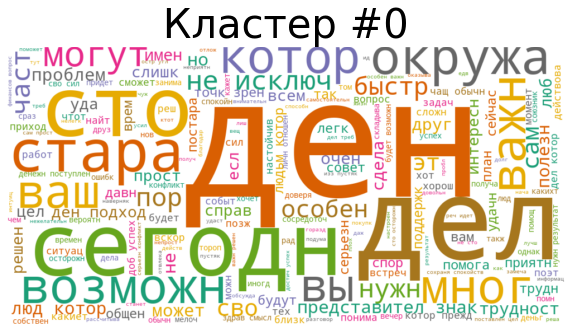

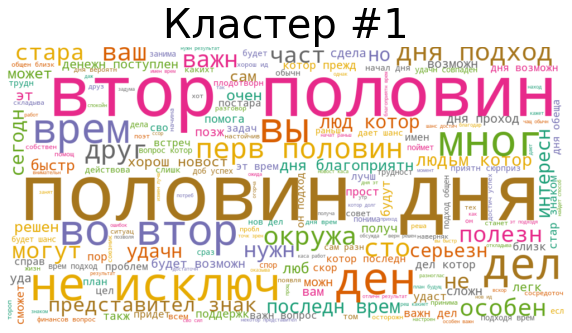

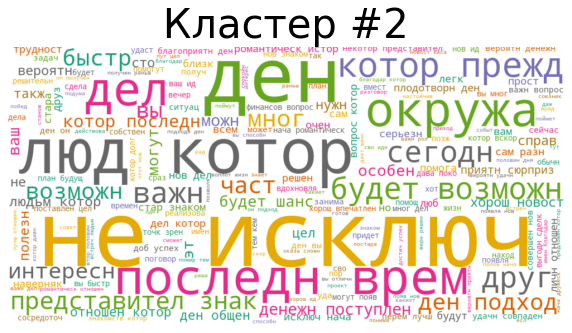

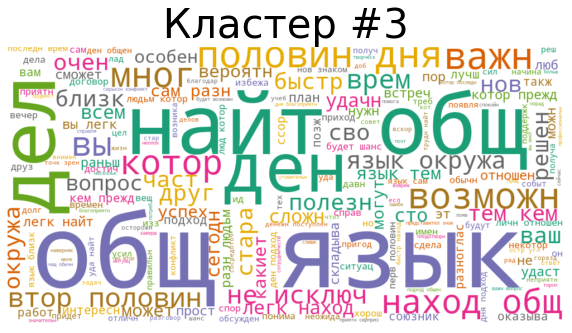

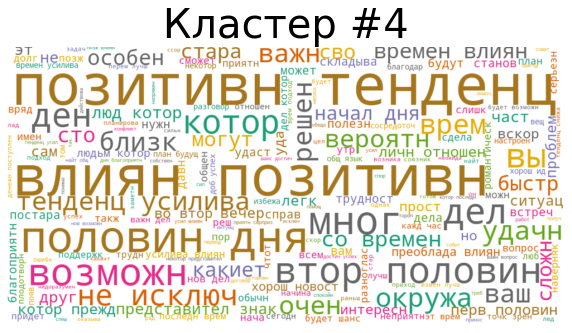

In [33]:
for i in range(num_clusters):
  wordcloud = WordCloud(background_color="white", width=1000, height=500,colormap='Dark2').generate(clusters_text[i])
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation='bilinear',)
  plt.axis("off")
  plt.title("Кластер #" + str(i), fontsize=40)
  plt.show()